In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import json


In [2]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%s' % str(np.around(float(height/item_count),decimals=2)),
                ha='center', va='bottom')

In [3]:
##Read in Classification csv
csv_path = "classifications/lsst_run_one.csv"
clsfn = pd.read_csv(csv_path)
#clsfn

In [4]:
##Create Subset of Relevant Classifications -- Difference Imaging Classifier Workflow
subset = clsfn.loc[clsfn['workflow_name'] == "Difference Imaging Classifier"]
#subset

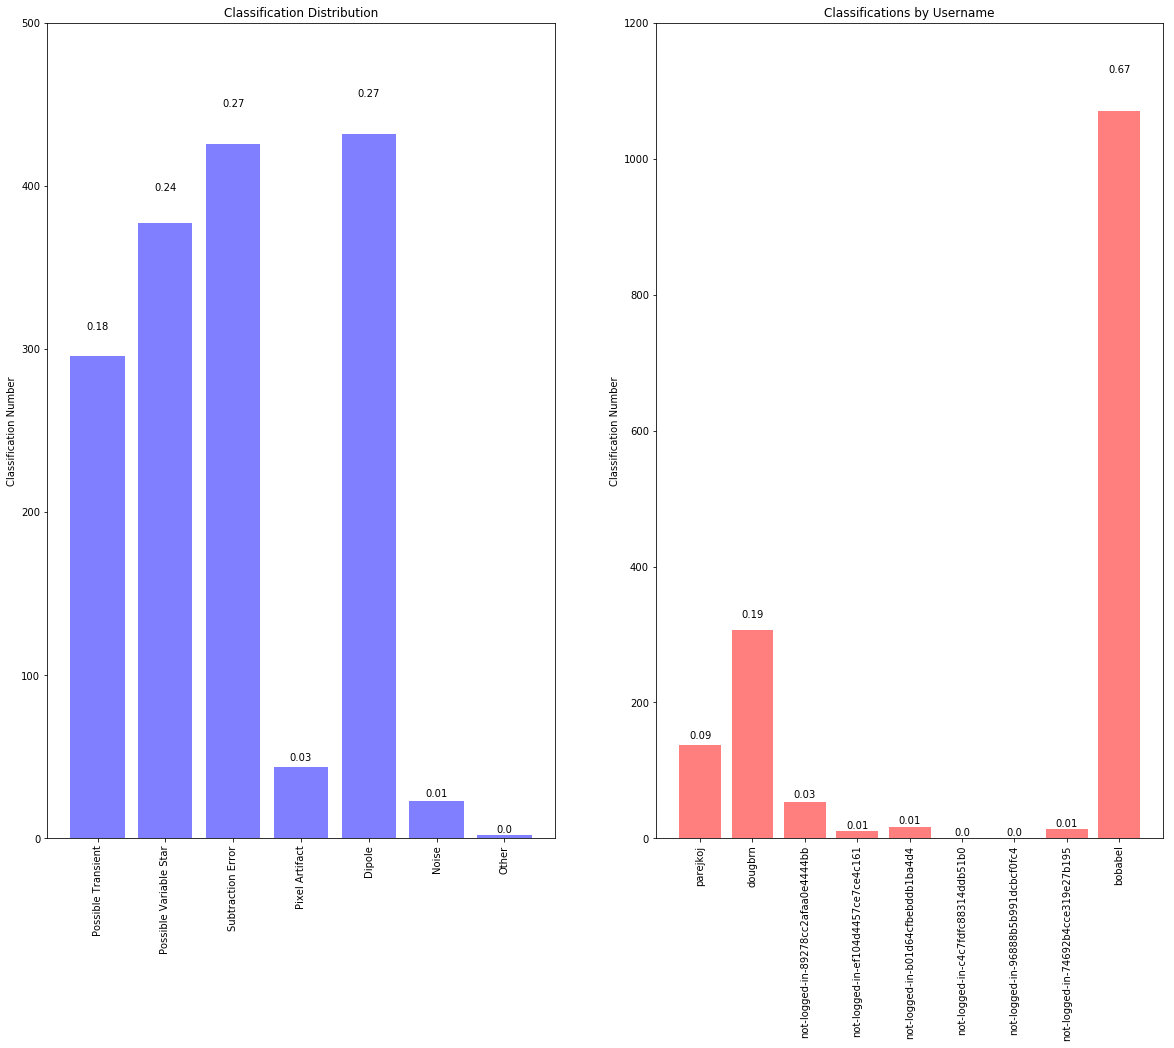

In [27]:
objects = ['Possible Transient', 'Possible Variable Star', 'Subtraction Error', 'Pixel Artifact', 'Dipole', 'Noise', 'Other']
counts=[0,0,0,0,0,0,0]
item_count=0
users = []
user_counts=[]

for item, row in subset.iterrows():
    s_data = json.loads(row.subject_data) #Subject Data
    a_data = json.loads(row.annotations)[0] #Annotations
    u_name = row.user_name #User Name
    s_id= s_data.keys()[0] #Subject ID
    data_dict=s_data[s_id]
    title=data_dict['image_title'][41:-4] #Image Title
    classification = a_data['value']
    if classification in objects:
        counts[objects.index(classification)]+=1
        item_count+=1
    if u_name not in users:
        users.append(u_name)
        user_counts.append(0)
        user_counts[users.index(u_name)]+=1
    elif u_name in users:
        user_counts[users.index(u_name)]+=1
        
    #print item, a_data['value'], u_name
#print users, user_counts


f, (ax1,ax2) = plt.subplots(1, 2)
f.set_figheight(15)
f.set_figwidth(20)

#Classification Distribution Bar Graph
y_pos = np.arange(len(objects))
class_dist=ax1.bar(y_pos,counts,align='center',alpha=0.5,color='b')
ax1.set_xticks(np.arange(len(objects)))
ax1.set_xticklabels(objects,rotation="vertical")
ax1.set_title("Classification Distribution")
ax1.set_ylabel("Classification Number")
ax1.set_ylim((0,500))
autolabel(class_dist,ax1)

#User Classification Amount
y_pos = np.arange(len(users))
#print users
user_dist=ax2.bar(y_pos,user_counts,align='center',alpha=0.5,color='r')
ax2.set_xticks(np.arange(len(users)))
ax2.set_xticklabels(users,rotation='vertical')
ax2.set_title("Classifications by Username")
ax2.set_ylabel("Classification Number")
ax2.set_ylim((0,1200))
autolabel(user_dist,ax2)

#plt.show()
plt.savefig("dist_and_users.png")

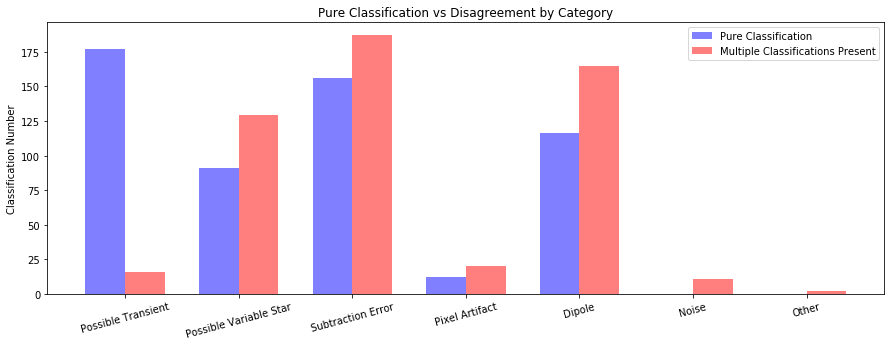

In [6]:
#Classification Disagreement (rate of disagreement among multi-classifier subjects)
objects = ['Possible Transient', 'Possible Variable Star', 'Subtraction Error', 
           'Pixel Artifact', 'Dipole', 'Noise', 'Other']
subject_dict={}
dis_counts=[0,0,0,0,0,0,0]
pure_counts=[0,0,0,0,0,0,0]

for item, row in subset.iterrows():
    s_data = json.loads(row.subject_data) #Subject Data
    a_data = json.loads(row.annotations)[0] #Annotations
    u_name = row.user_name #User Name
    s_id= s_data.keys()[0] #Subject ID
    data_dict=s_data[s_id]
    title=data_dict['image_title'][41:-4] #Image Title
    classification = a_data['value']
    if title in subject_dict.keys():
        subject_dict[title].append(classification)
    else:
        subject_dict[title]=[]
        subject_dict[title].append(classification)
        
for subject in subject_dict.keys():
    class_list=subject_dict[subject]
    if len(class_list) > 1: #Only look at subjects with more than one classification
        if len(set(objects).intersection(class_list)) >1: #Are there multiple unique classifications?
            for classification in class_list:
                if classification in objects:
                    dis_counts[objects.index(classification)]+=1
                    
        else:
            for classification in class_list:
                if classification in objects:
                    pure_counts[objects.index(classification)]+=1
            
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(15)

#Classification Distribution Bar Graph
ind = np.arange(len(objects))  # the x locations for the groups
width = 0.35 
y_pos = np.arange(len(objects))
pure_dist=ax1.bar(y_pos-width/2,pure_counts, width, alpha=0.5,color='b')
dis_dist=ax1.bar(y_pos+width/2,dis_counts, width, alpha=0.5,color='r')
ax1.set_xticks(np.arange(len(objects)))
ax1.set_xticklabels(objects,rotation=15)
ax1.set_title("Pure Classification vs Disagreement by Category")
ax1.set_ylabel("Classification Number")
ax1.legend((pure_dist[0], dis_dist[0]), ('Pure Classification', 'Multiple Classifications Present'))
#ax1.set_ylim((0,500))
#autolabel(pure_dist,ax1)

plt.savefig("classification_disagreement.png")

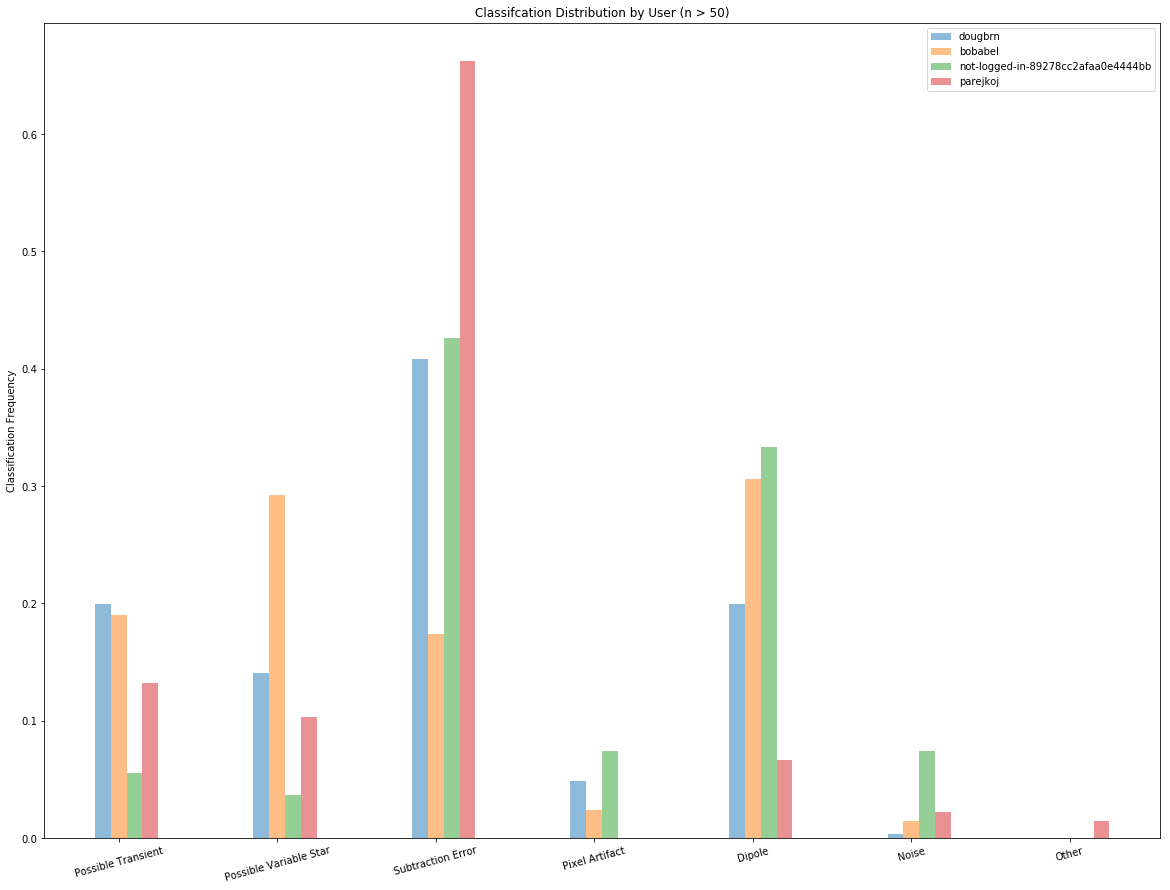

In [35]:
objects = ['Possible Transient', 'Possible Variable Star', 'Subtraction Error', 'Pixel Artifact', 'Dipole', 'Noise', 'Other']
users = []
user_counts=[]
user_dict = {}

for item, row in subset.iterrows():
    s_data = json.loads(row.subject_data) #Subject Data
    a_data = json.loads(row.annotations)[0] #Annotations
    u_name = row.user_name #User Name
    s_id= s_data.keys()[0] #Subject ID
    data_dict=s_data[s_id]
    title=data_dict['image_title'][41:-4] #Image Title
    classification = a_data['value']

for item, row in subset.iterrows():
    s_data = json.loads(row.subject_data) #Subject Data
    a_data = json.loads(row.annotations)[0] #Annotations
    u_name = row.user_name #User Name
    s_id= s_data.keys()[0] #Subject ID
    data_dict=s_data[s_id]
    title=data_dict['image_title'][41:-4] #Image Title
    classification = a_data['value']
    if u_name not in user_dict.keys():
        users.append(u_name)
        user_counts.append(0)
        user_counts[users.index(u_name)]+=1
        
        user_dict[u_name] = np.zeros(len(objects))
        if classification != None:
            user_dict[u_name][objects.index(classification)]+=1
        
    elif u_name in user_dict.keys():
        user_counts[users.index(u_name)]+=1
        if classification != None:
            user_dict[u_name][objects.index(classification)]+=1
# Enforce a minimum of 50 classifications for consideration          
for key in user_dict.keys():
    if sum(user_dict.get(key))<50.0:
        del user_dict[key]
    else:
        user_dict[key]=user_dict[key]/sum(user_dict.get(key))


f, ax1 = plt.subplots()
f.set_figheight(15)
f.set_figwidth(20)

ind = np.arange(len(objects))  # the x locations for the groups
width = 0.1
y_pos = np.arange(len(objects))
bars=[None]*len(user_dict.keys())
bar_count=0
delta_width=-width
for user in user_dict.keys():
    bars[bar_count] = ax1.bar(y_pos+delta_width,user_dict.get(user),width,alpha=0.5)
    delta_width+=width
    bar_count+=1
ax1.set_xticks(np.arange(len(objects)))
ax1.set_xticklabels(objects,rotation=15)
ax1.set_title("Classifcation Distribution by User (n > 50)")
ax1.set_ylabel("Classification Frequency")
ax1.legend(bars, user_dict.keys())
#ax1.set_ylim((0,500))



#plt.show()
plt.savefig("user_bias.png")


In [22]:
for key in user_dict.keys():
    if sum(user_dict.get(key))<50.0:
        del user_dict[key]
    else:
        user_dict[key]=user_dict[key]/sum(user_dict.get(key))
user_dict
len(bars)

4

In [32]:
bars

[<Container object of 7 artists>, None, None, None]